## Import necessary packages

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import hypertools as hyp
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('poster')
sns.set_palette('hls')

## Load in csv file

In [2]:
data = pd.read_csv('GSS 4.csv')
data.set_index('Unnamed: 0', inplace=True)

In [3]:
data.head()

,age,region,health,general_happy,past_week_happy,see_friends,see_relatives,income,work_hours,job_satisfaction,weekend_internet,weekday_internet,use_twitter,internet_per_week
Unnamed: 0,,,,,,,,,,,,,,
0,47.0,New england,Good,Pretty happy,NaN,Sev times a year,Almost daily,170000.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
1,61.0,New england,NaN,Pretty happy,NaN,Sev times a year,Sev times a year,54999.0,NaN,Very satisfied,NaN,NaN,No,NaN
2,72.0,New england,Good,Very happy,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,43.0,New england,Good,Pretty happy,NaN,Sev times a week,Sev times a week,11249.0,NaN,Very satisfied,NaN,NaN,NaN,NaN
4,55.0,New england,Excellent,Very happy,Most of the time,NaN,NaN,1999.0,NaN,Mod. satisfied,1.0,1.0,No,7.0


## Is happiness data clustered?

### General happiness

/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:118: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:85: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


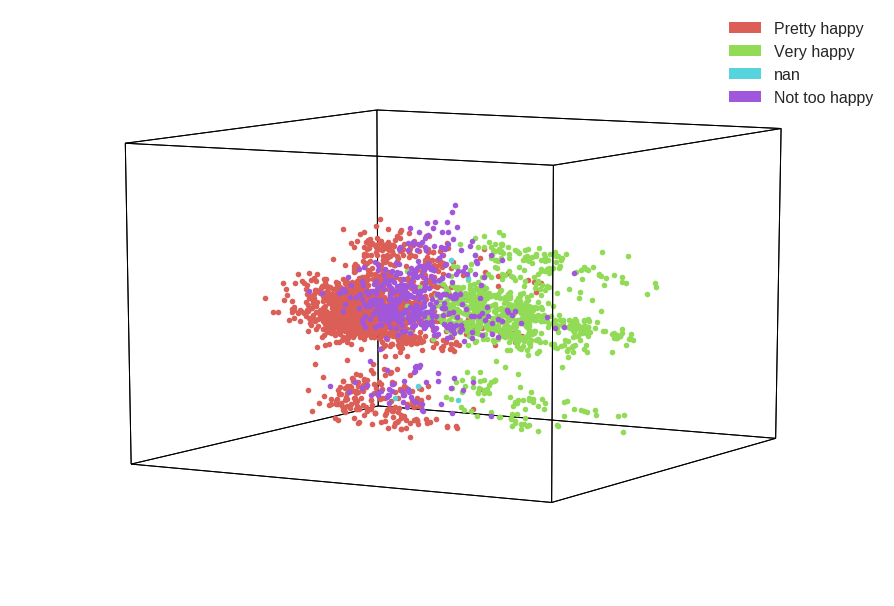

(<matplotlib.figure.Figure at 0x7faf38614c50>,
 [array([[  4.70000000e+01,   1.70000000e+05,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  6.10000000e+01,   5.49990000e+04,              nan, ...,
            1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [  7.20000000e+01,              nan,              nan, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         ..., 
         [  7.20000000e+01,              nan,              nan, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [             nan,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [             nan,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])],
 None)

In [4]:
hyp.plot(data, '.', group = data['general_happy'], legend = data['general_happy'].unique())

### Happy in past week

/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:118: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:85: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


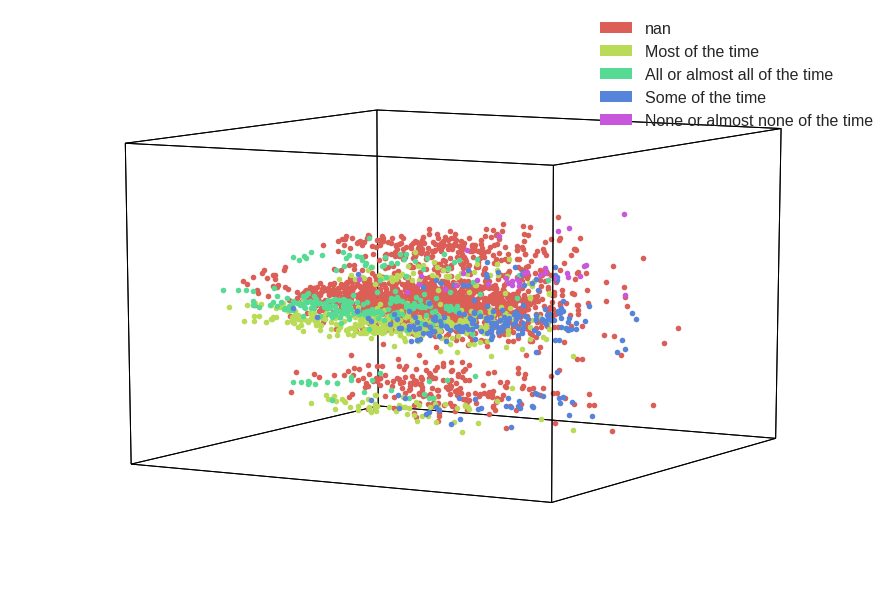

(<matplotlib.figure.Figure at 0x7faf4b464550>,
 [array([[  4.70000000e+01,   1.70000000e+05,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  6.10000000e+01,   5.49990000e+04,              nan, ...,
            1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [  7.20000000e+01,              nan,              nan, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         ..., 
         [  7.20000000e+01,              nan,              nan, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [             nan,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [             nan,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])],
 None)

In [5]:
hyp.plot(data, '.', group = data['past_week_happy'], legend = data['past_week_happy'].unique())

## Is work data clustered?

job_satisfaction


/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:118: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:85: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


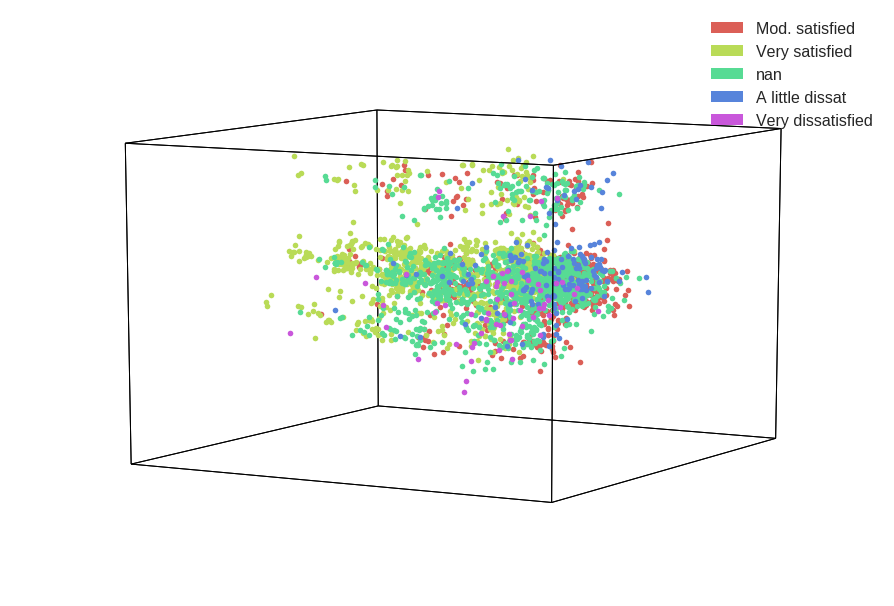

work_hours


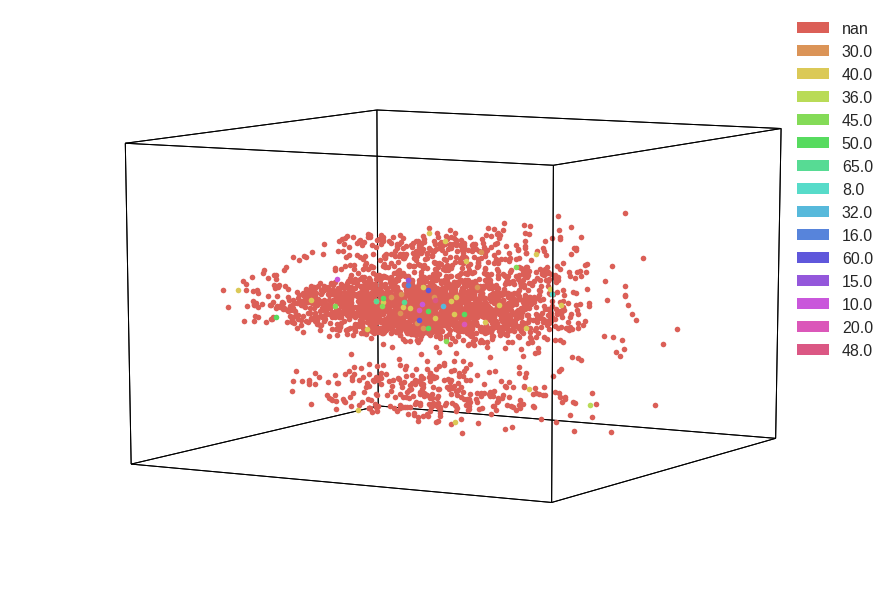

income


IndexError: list index out of range

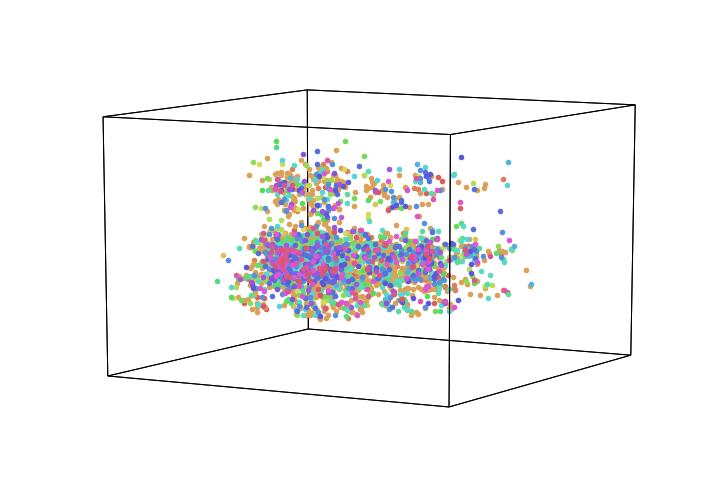

In [7]:
for column in ['job_satisfaction', 'work_hours', 'income']:
    
    print(column)

    hyp.plot(data, '.', group = data[column], legend = data[column].unique())

## How does happiness in the past week relate to general happiness?

In [174]:
#this function creates a barplot based on two factors, one along the x axis and one represented by hue
#y values within each category on the x axis represent the frequency of a variable of interest within that category
    #in other words, how much of the x axis category is attributed to a certain hue?

#data: dataframe
#x_axis: string representing column within the data frame
#hue: string representing column within the data frame
#x_axis_order: list containing strings in the order you want values to display on the x axis
#hue_order: list containing strings in the order you want values to display for hue

def freq_plot(data, x_axis, hue, x_axis_order, hue_order): 

    data_subset = data[data[hue].notnull() & data[x_axis].notnull()]

    hue_df = data_subset[hue]
    x_axis_df = data_subset[x_axis]

    #make a data frame containing frequencies of general happiness within each level of past week happiness
    #(e.g. what percentage of people who reported 'all of the time' past week happiness consider themselves 'very happy'?)
    df = pd.DataFrame(columns = ['value', hue, x_axis])
    
    value_list = []
    h_list = []
    x_list = []

    for h in pd.unique(hue_df):
    
        #get all values where hue is this value
        hue_inds = hue_df == h
    
        for x in pd.unique(x_axis_df):
        
            #get all values where x axis is this value
            x_axis_inds = x_axis_df == x
        
            #get the frequency of hue in this particular x axis category
            value = np.divide(float(sum(hue_inds & x_axis_inds)), float(sum(x_axis_inds)))
        
            value_list.append(value)
            h_list.append(h)
            x_list.append(x)

    df['value'] = value_list
    df[hue] = h_list
    df[x_axis] = x_list
    
    #plot
    ax = sns.barplot(x = x_axis, y = 'value', hue = hue, data = df, order = x_axis_order, hue_order = hue_order)
    ax.set(xlabel= x_axis, ylabel = 'Frequency')     
    
    plt.show()

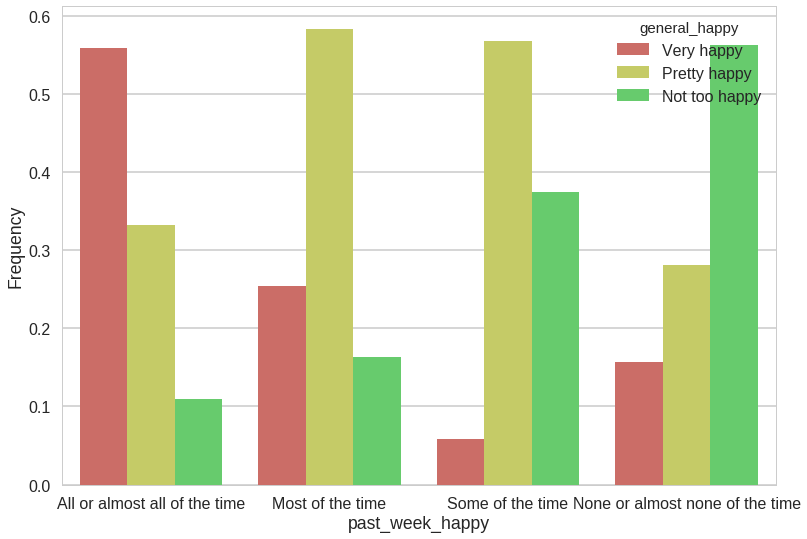

In [176]:
#plot general happiness within past week happiness
data = data
x_axis = 'past_week_happy'
hue = 'general_happy'
x_axis_order = ['All or almost all of the time', 'Most of the time', 'Some of the time', 'None or almost none of the time']
hue_order = ['Very happy', 'Pretty happy', 'Not too happy']

freq_plot(data, x_axis, hue, x_axis_order, hue_order)

Amount of happiness in the past week seems to be a good indicator of general happiness level.

## What does work look like for different levels of happiness?

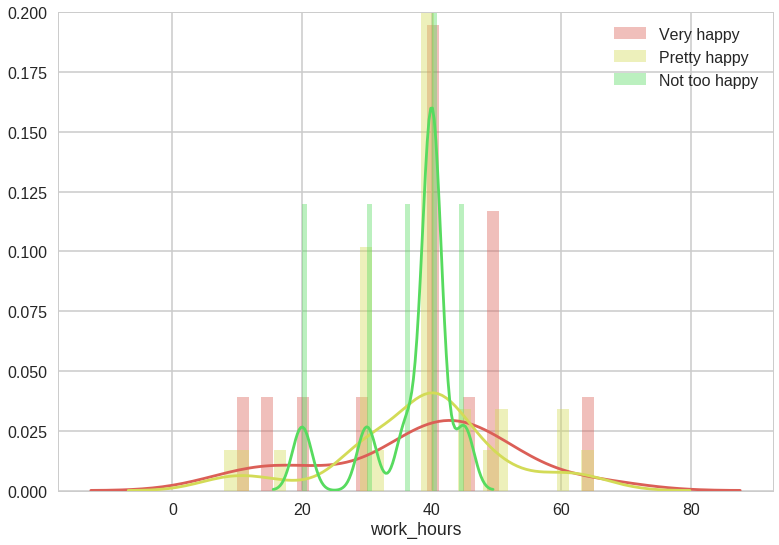

In [20]:
#plot distribution of work hours for each general happiness level
for p in ['Very happy', 'Pretty happy', 'Not too happy']:
    
    sns.distplot(data[data['general_happy']==p]['work_hours'].dropna(), bins = 30, label = p)
    
sns.plt.ylim(0,0.2)
sns.plt.legend()

All happiness levels have the most people working at 40 hrs/wk. People who are very happy are skewed towards working more hours than people who are pretty happy. People who are not too happy spike at 20, 30, and 40 hrs/wk, and drop off after that.

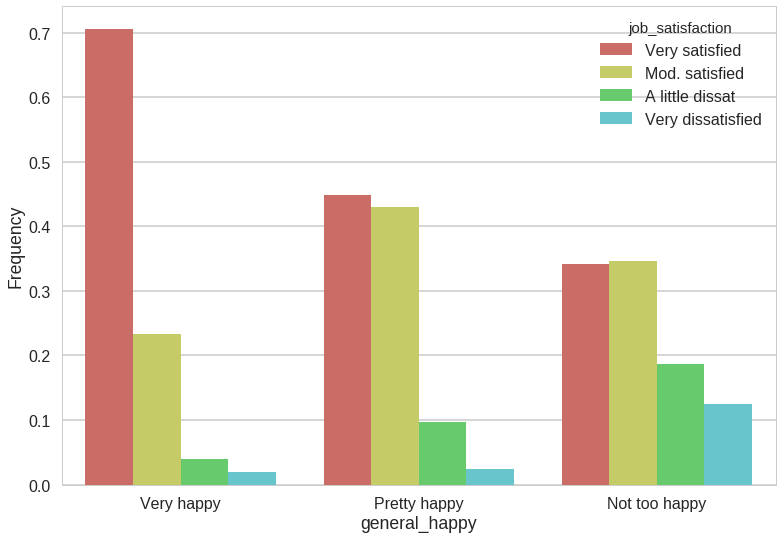

In [157]:
#plot job satisfaction for each happiness level
data = data
x_axis = 'general_happy'
hue = 'job_satisfaction'
x_axis_order = ['Very happy', 'Pretty happy', 'Not too happy']
hue_order = ['Very satisfied', 'Mod. satisfied', 'A little dissat', 'Very dissatisfied']

freq_plot(data, x_axis, hue, x_axis_order, hue_order)

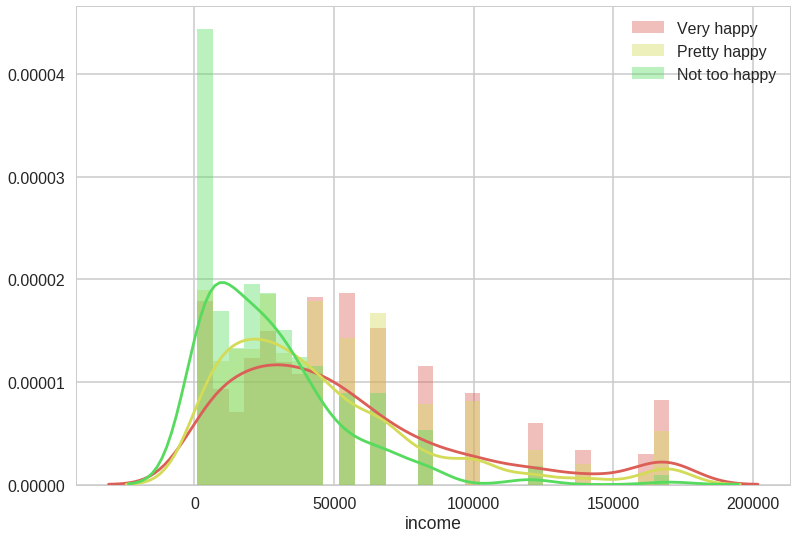

In [22]:
#plot income distribution for each happiness level
for p in ['Very happy', 'Pretty happy', 'Not too happy']:
    
    sns.distplot(data[data['general_happy']==p]['income'].dropna(), bins = 30, label = p)
    
sns.plt.legend()

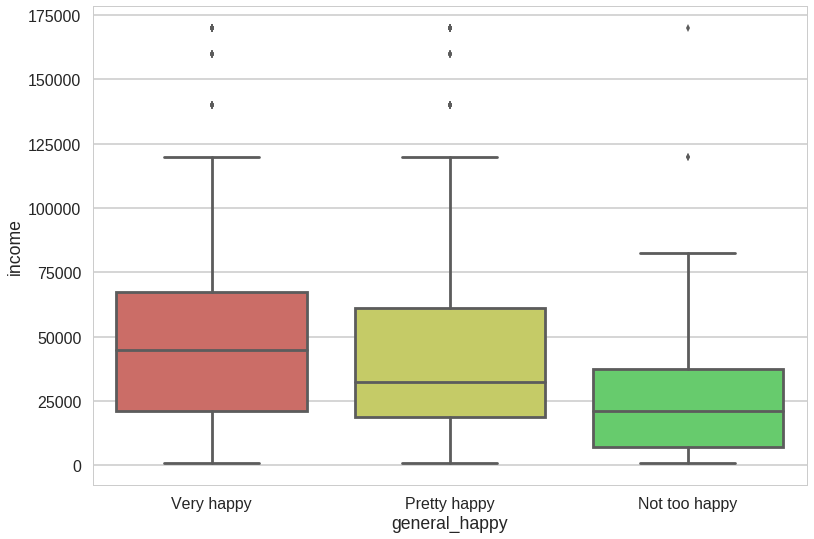

In [23]:
#another way to visualize: box plot
sns.boxplot(x = 'general_happy', y = 'income', data = data, order = ['Very happy', 'Pretty happy', 'Not too happy'])

## How do demographics factor in?

### Age

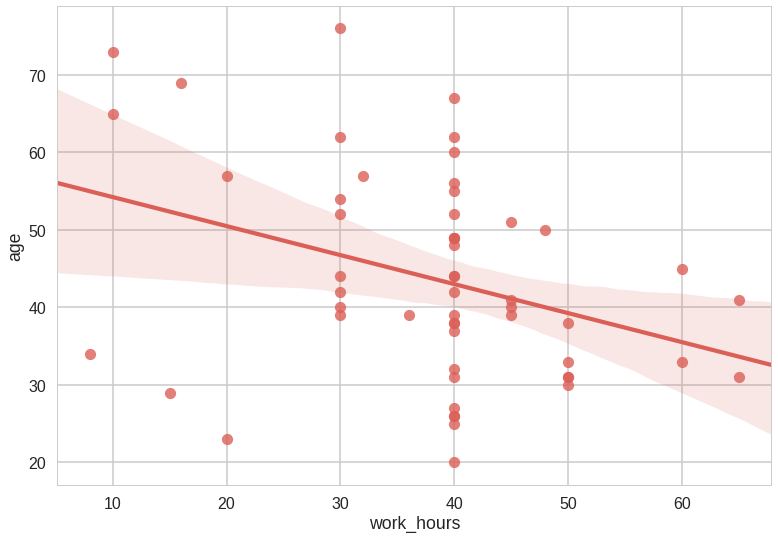

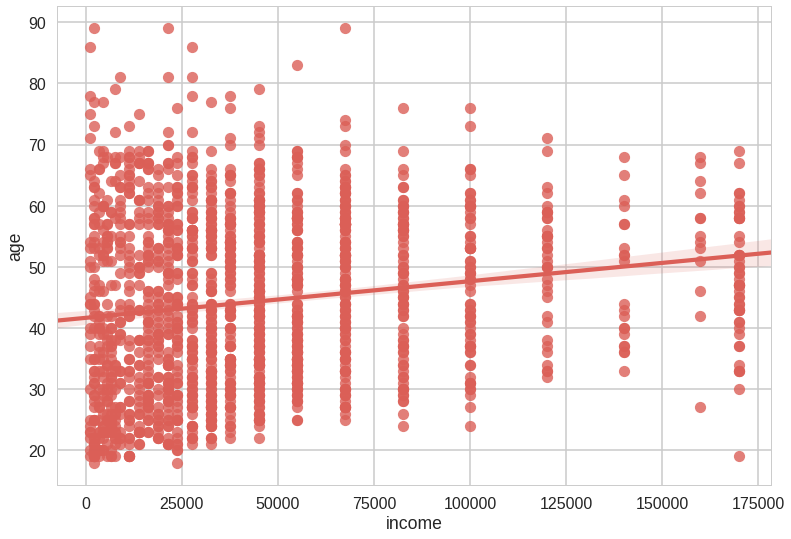

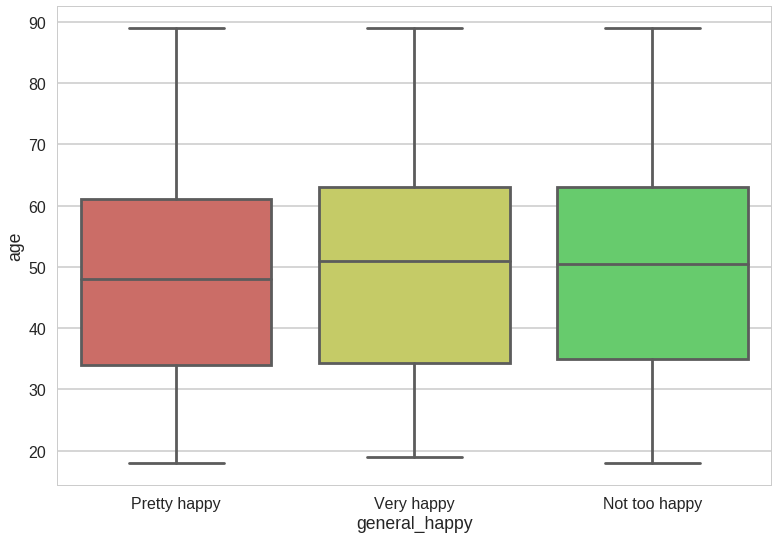

In [24]:
#work hours
sns.regplot(x = 'work_hours', y = 'age', data = data)
sns.plt.show()

#income
sns.regplot(x = 'income', y = 'age', data = data)
sns.plt.show()

#general happiness
sns.boxplot(x = 'general_happy', y = 'age', data = data)

### Health

In [25]:
data['health'].unique()

array(['Good', nan, 'Excellent', 'Poor', 'Fair'], dtype=object)

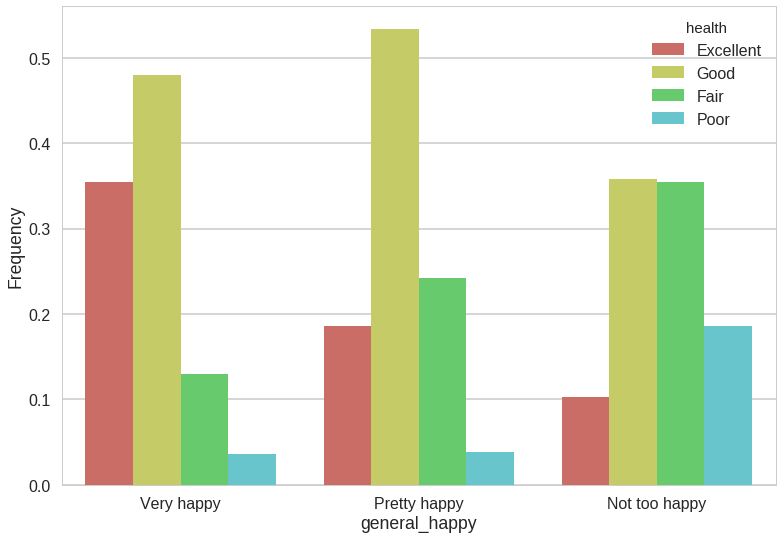

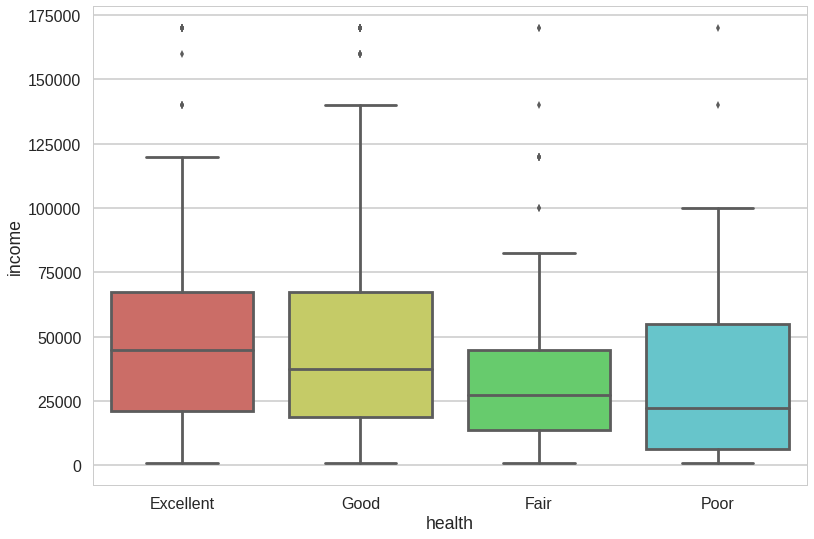

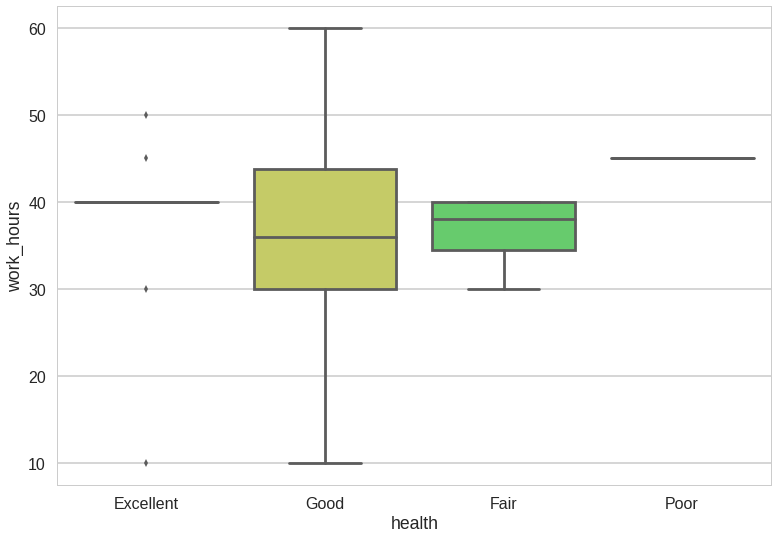

In [161]:
#general happiness
data = data
x_axis = 'general_happy'
hue = 'health'
x_axis_order = ['Very happy', 'Pretty happy', 'Not too happy']
hue_order = ['Excellent', 'Good', 'Fair', 'Poor']

freq_plot(data, x_axis, hue, x_axis_order, hue_order)

#income
sns.boxplot(x = 'health', y = 'income', data = data, order = ['Excellent', 'Good', 'Fair', 'Poor'])
sns.plt.show()

#work hours
sns.boxplot(x = 'health', y = 'work_hours', data = data, order = ['Excellent', 'Good', 'Fair', 'Poor'])